# EDA

In [174]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dython import nominal

In [3]:
df = pd.read_csv('data_cleaned.csv')

In [4]:
df.head(5)

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_periods
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


In [ ]:
df.SeniorCitizen = df.SeniorCitizen.astype('str')

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   Tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [163]:
df.describe()

,Tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


Lets take a closer look at churners

<AxesSubplot:title={'center':'Churn rate'}, xlabel='Churn', ylabel='Count'>

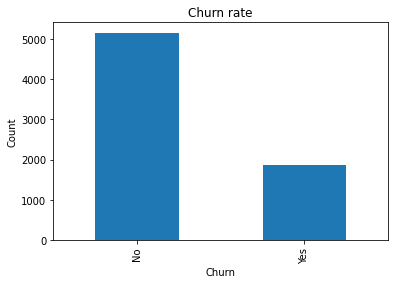

In [16]:
df.Churn.value_counts().plot(kind='bar', ylabel = 'Count', xlabel = 'Churn', title='Churn rate')

In [195]:
print(df.Churn.value_counts(normalize = True))

0    0.734215
1    0.265785
Name: Churn, dtype: float64


We can see that about 73% of customers did not churn and around 27% did churn. There might be some problems with model building because training data will be inbalanced. We might need to use some oversampling techniques. But will get back to it later in model building part.

Now lets split this data into categorical and numerical data.

In [19]:
df.columns

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'Tenure_periods'],
      dtype='object')

In [94]:
categorical = ['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Tenure_periods']

In [26]:
numerical = ['Tenure', 'MonthlyCharges', 'TotalCharges']

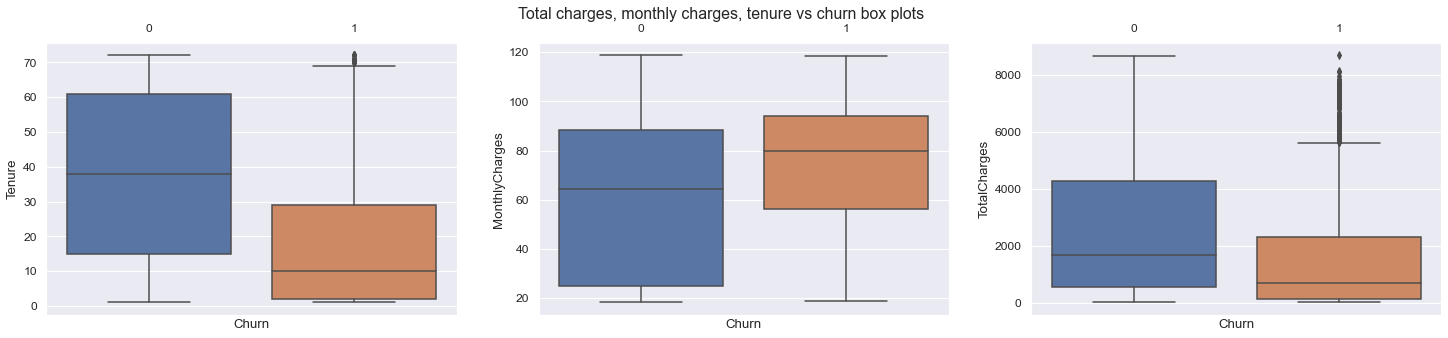

In [299]:
tmp_list = [['Tenure', 'MonthlyCharges', 'TotalCharges']]
sns.set(font_scale=1.1)
fig, axes = plt.subplots(1, 3, figsize=(25, 5), sharey=False)
fig.suptitle('Total charges, monthly charges, tenure vs churn box plots')

for i in range(len(numerical)):
    sns.boxplot(ax = axes[i],data = df, x = 'Churn', y = numerical[i])

Low tenure rates, high average monthly charges and low average total charges are linked to high churn rate.

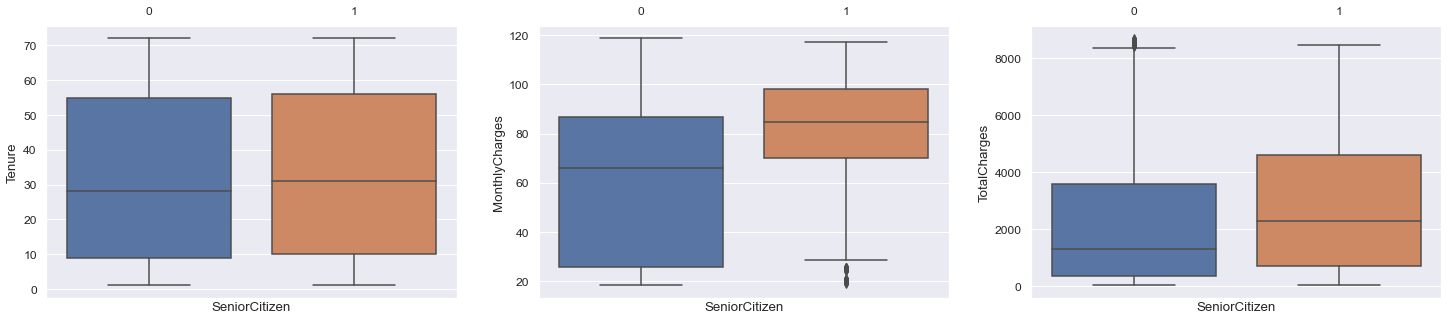

In [300]:
tmp_list = [['Tenure', 'MonthlyCharges', 'TotalCharges']]
fig, axes = plt.subplots(1, 3, figsize=(25, 5), sharey=False)

for i in range(len(numerical)):
    sns.boxplot(ax = axes[i],data = df, x = 'SeniorCitizen', y = numerical[i])

Senior citizens tends to pay higher monthly charges.

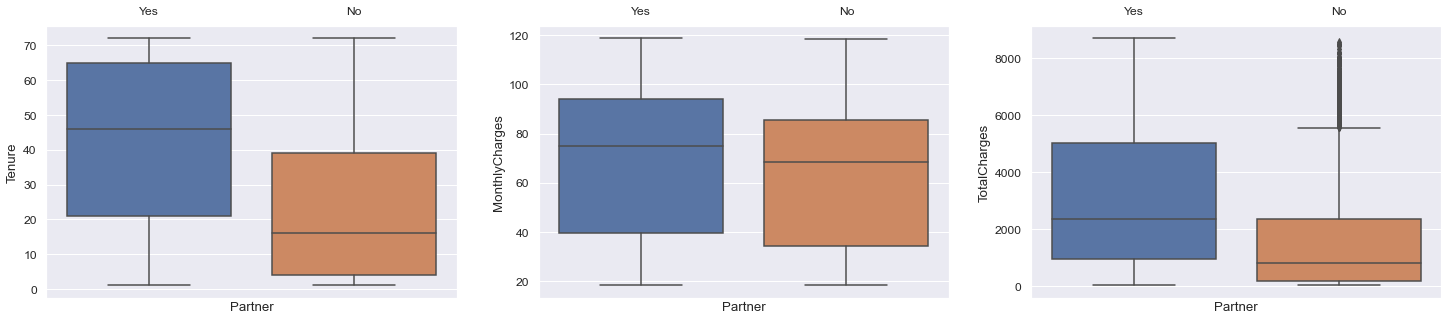

In [301]:
tmp_list = [['Tenure', 'MonthlyCharges', 'TotalCharges']]
fig, axes = plt.subplots(1, 3, figsize=(25, 5), sharey=False)

for i in range(len(numerical)):
    sns.boxplot(ax = axes[i],data = df, x = 'Partner', y = numerical[i])

Customers who has partners commits for longer tenure period and for that reason total charges are higher.

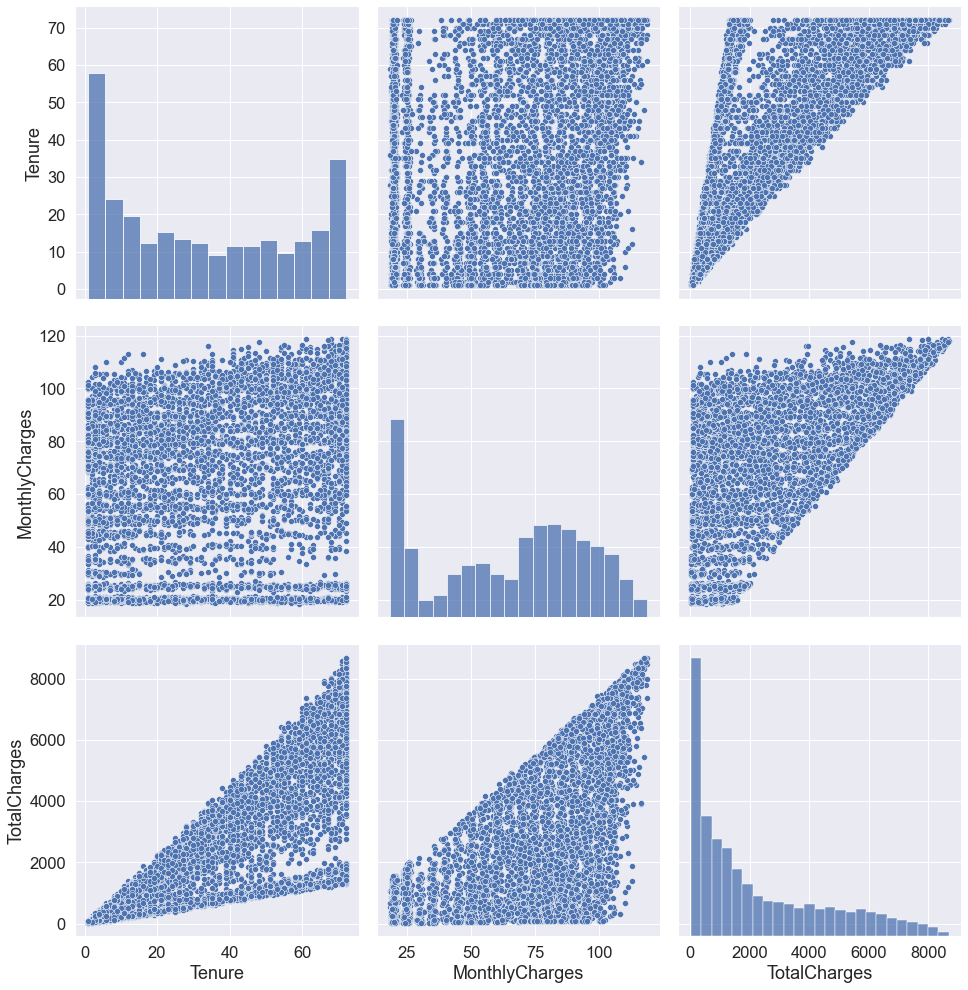

In [173]:
#plot the pair plot of salary, balance and age in data dataframe.
g = sns.pairplot(data = df, vars=['Tenure','MonthlyCharges','TotalCharges'])
g.fig.set_size_inches(15,15)

The continous data is not normaly distributed. Before making our models we should take a look at this. Might need to do one of the standartalization methods. 

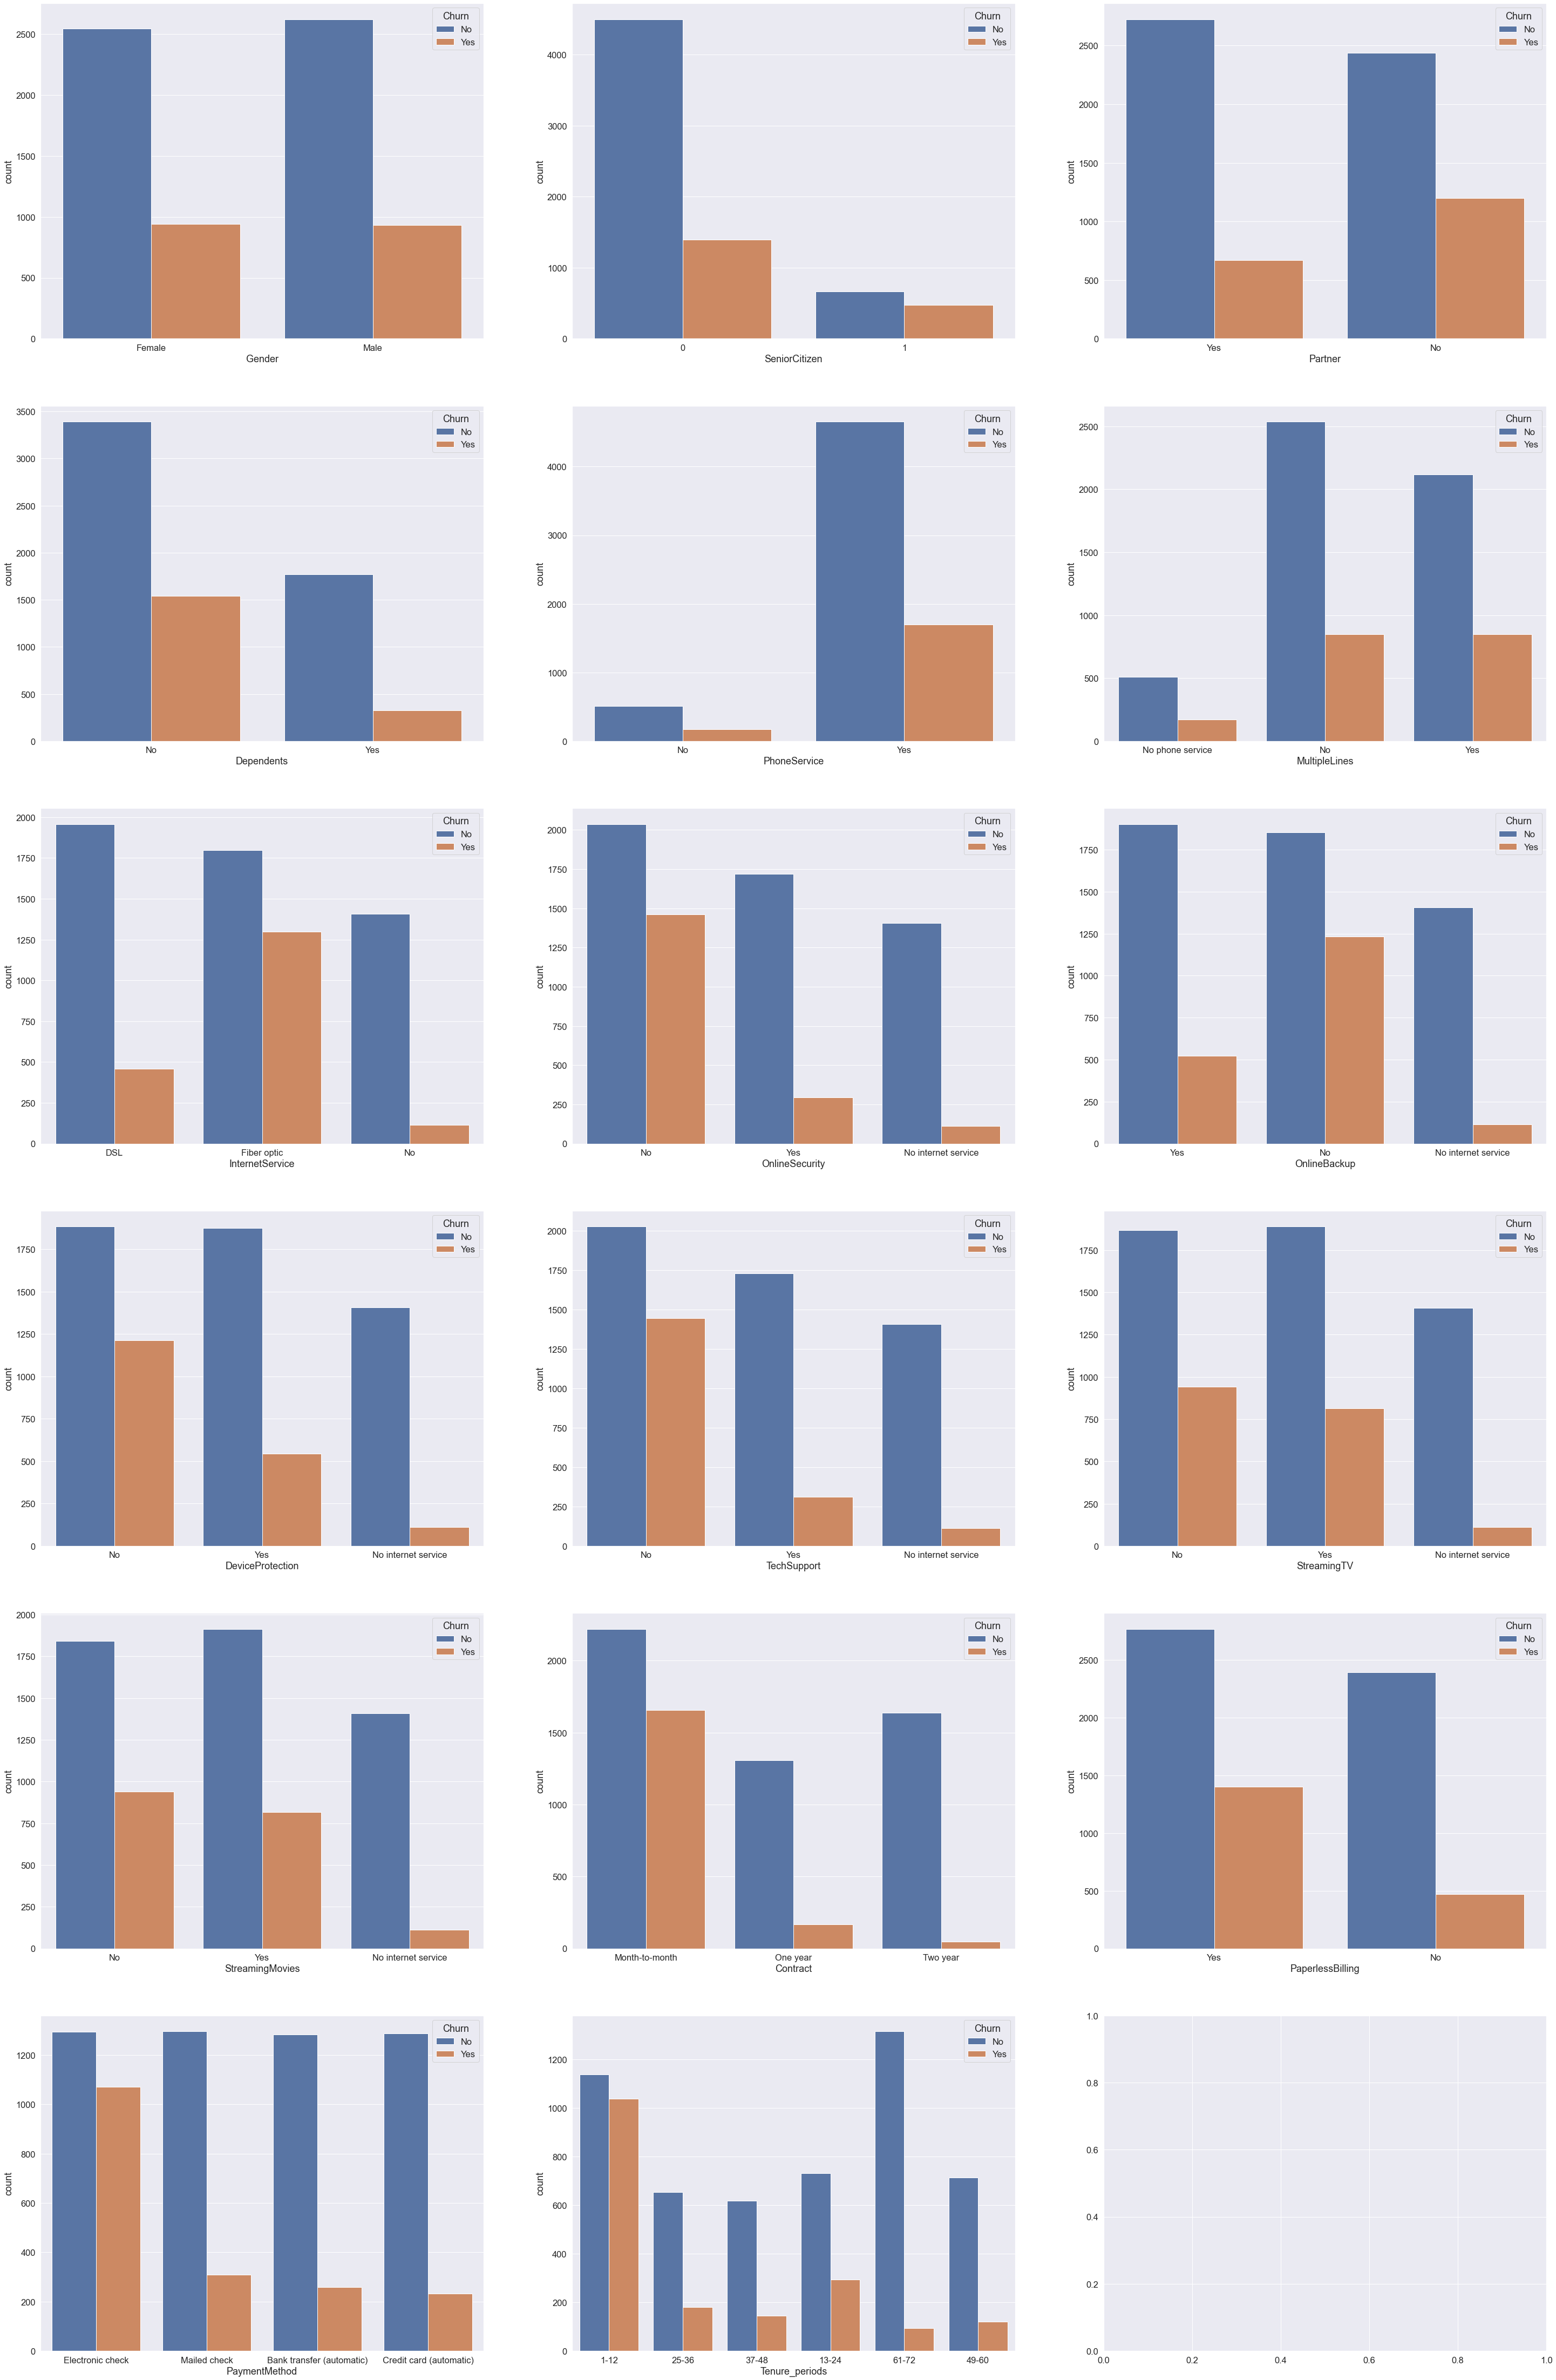

In [177]:
sns.set(font_scale=1.5)
fig , ax = plt.subplots(6,3,figsize = (50,80))
for i , subplots in zip (categorical , ax.flatten()):
  sns.countplot(data =df, x = i ,hue = 'Churn', ax = subplots)
plt.show()

<AxesSubplot:xlabel='Tenure_periods', ylabel='count'>

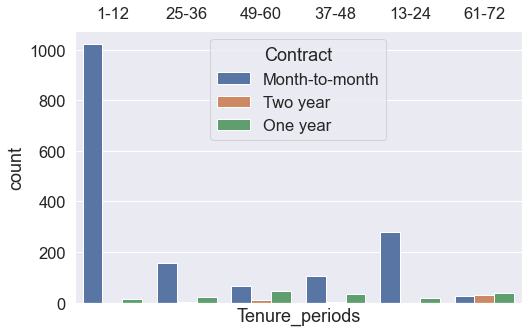

In [286]:
sns.countplot(data =df[df['Churn'] == 1], x = 'Tenure_periods' ,hue = 'Contract')

We could see HIGH Churn rate in Month-to-Month contracts, customers with no Online security and with No Technical support. <br>
We could see LOW Churn rate in customers with Two-Year Contracts, with no internet service and customers who are commited for 5 and over years.

We are going to need dummy variables for further analysis

In [189]:
df['Churn'] = df['Churn'].apply(lambda x : 1 if 'yes' in x.lower() else 0)

In [196]:
df_dummies = pd.get_dummies(df)
df_dummies.head(5)

,Tenure,MonthlyCharges,TotalCharges,Churn,Gender_Female,Gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure_periods_1-12,Tenure_periods_13-24,Tenure_periods_25-36,Tenure_periods_37-48,Tenure_periods_49-60,Tenure_periods_61-72
0,1,29.85,29.85,0,1,0,1,0,0,1,...,0,0,1,0,1,0,0,0,0,0
1,34,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,2,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,45,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,2,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


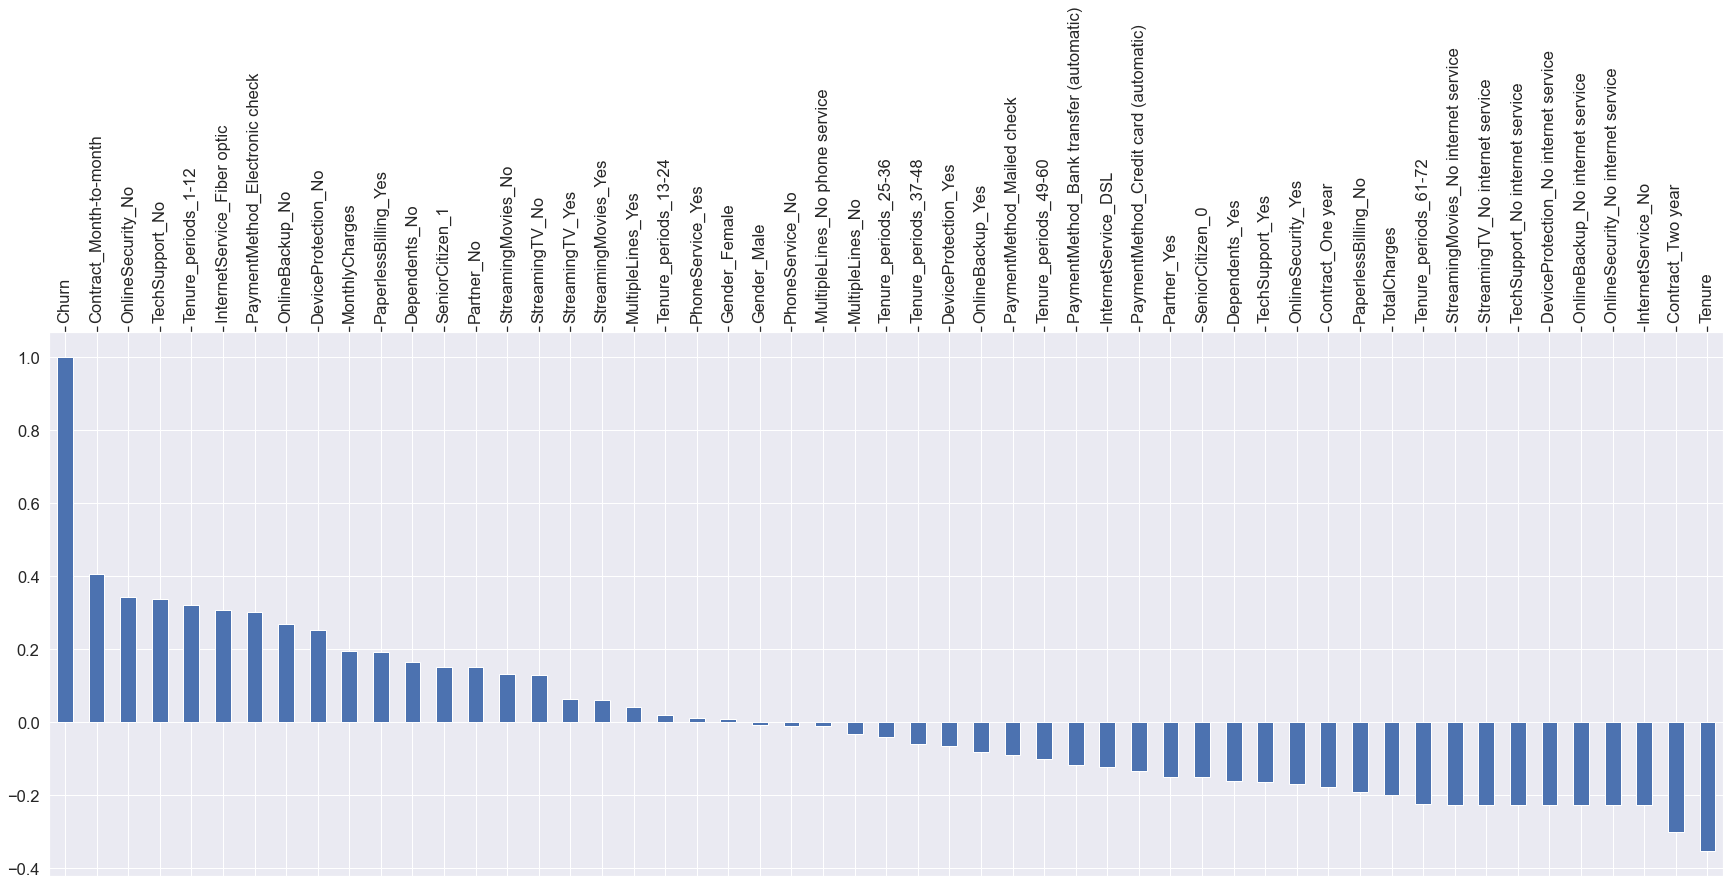

In [261]:
plt.figure(figsize=(30,10))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')
plt.show()

These correlation coefficients and the heatmat below just proves the insights made above. 

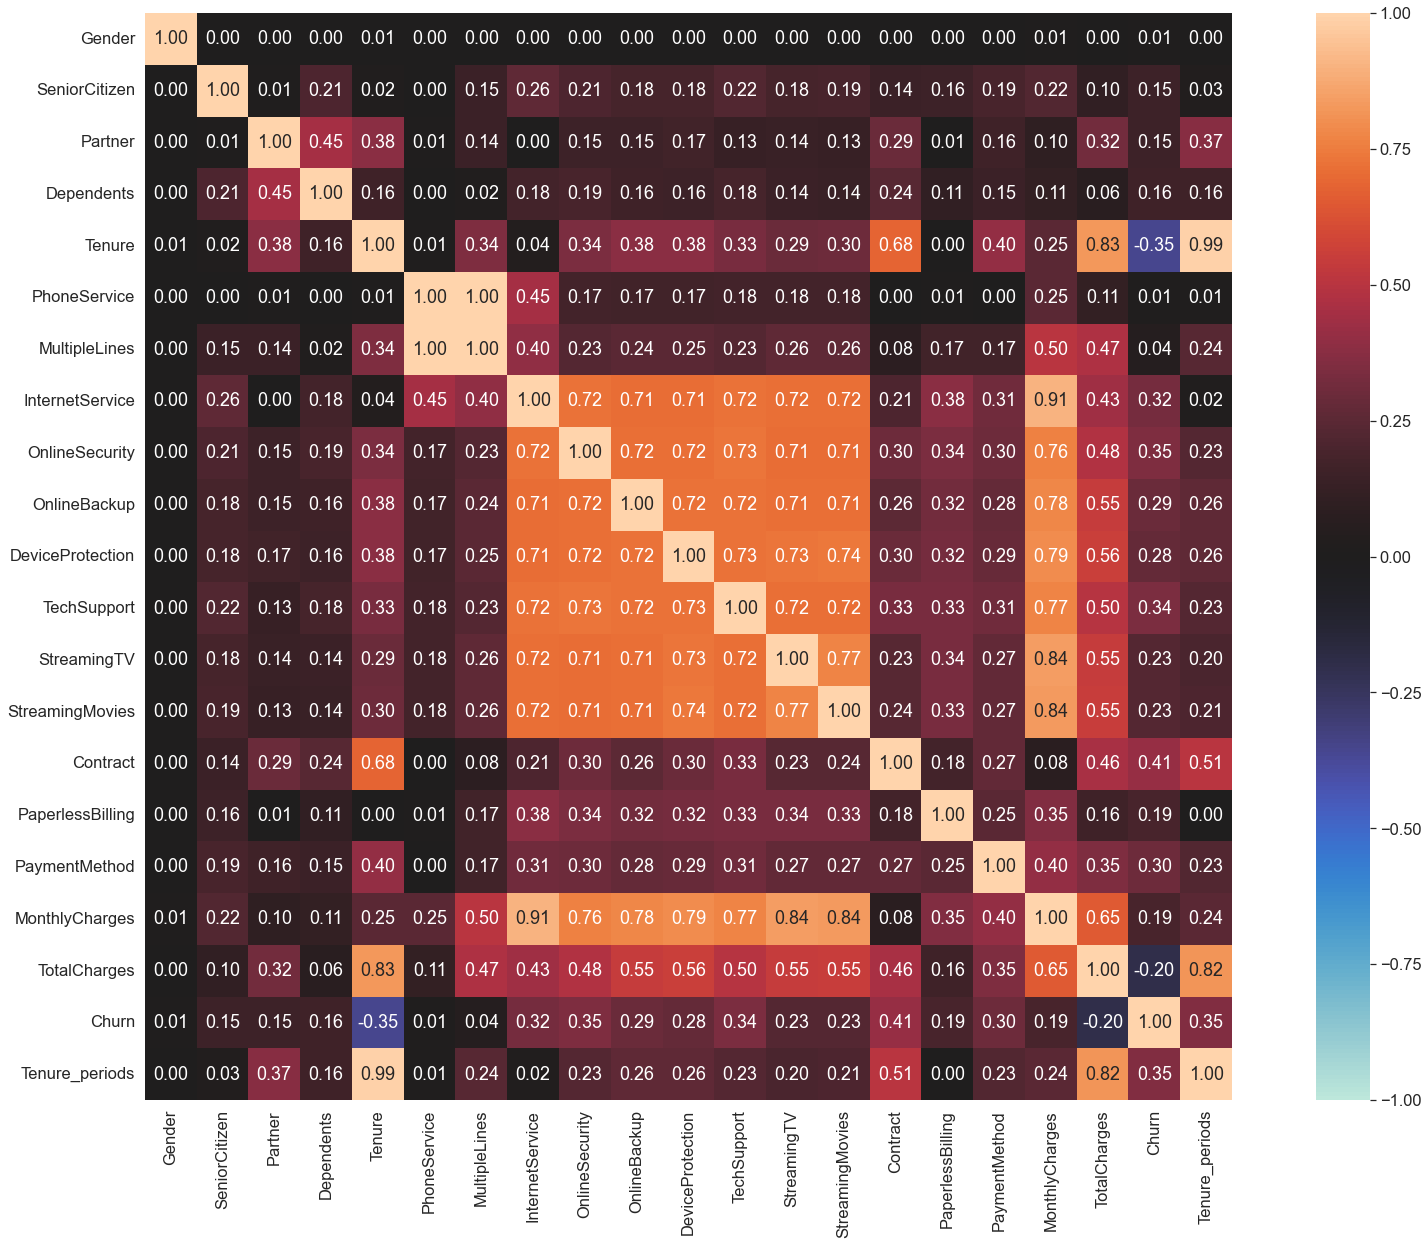

In [239]:
nominal.associations(df,figsize=(30,20));

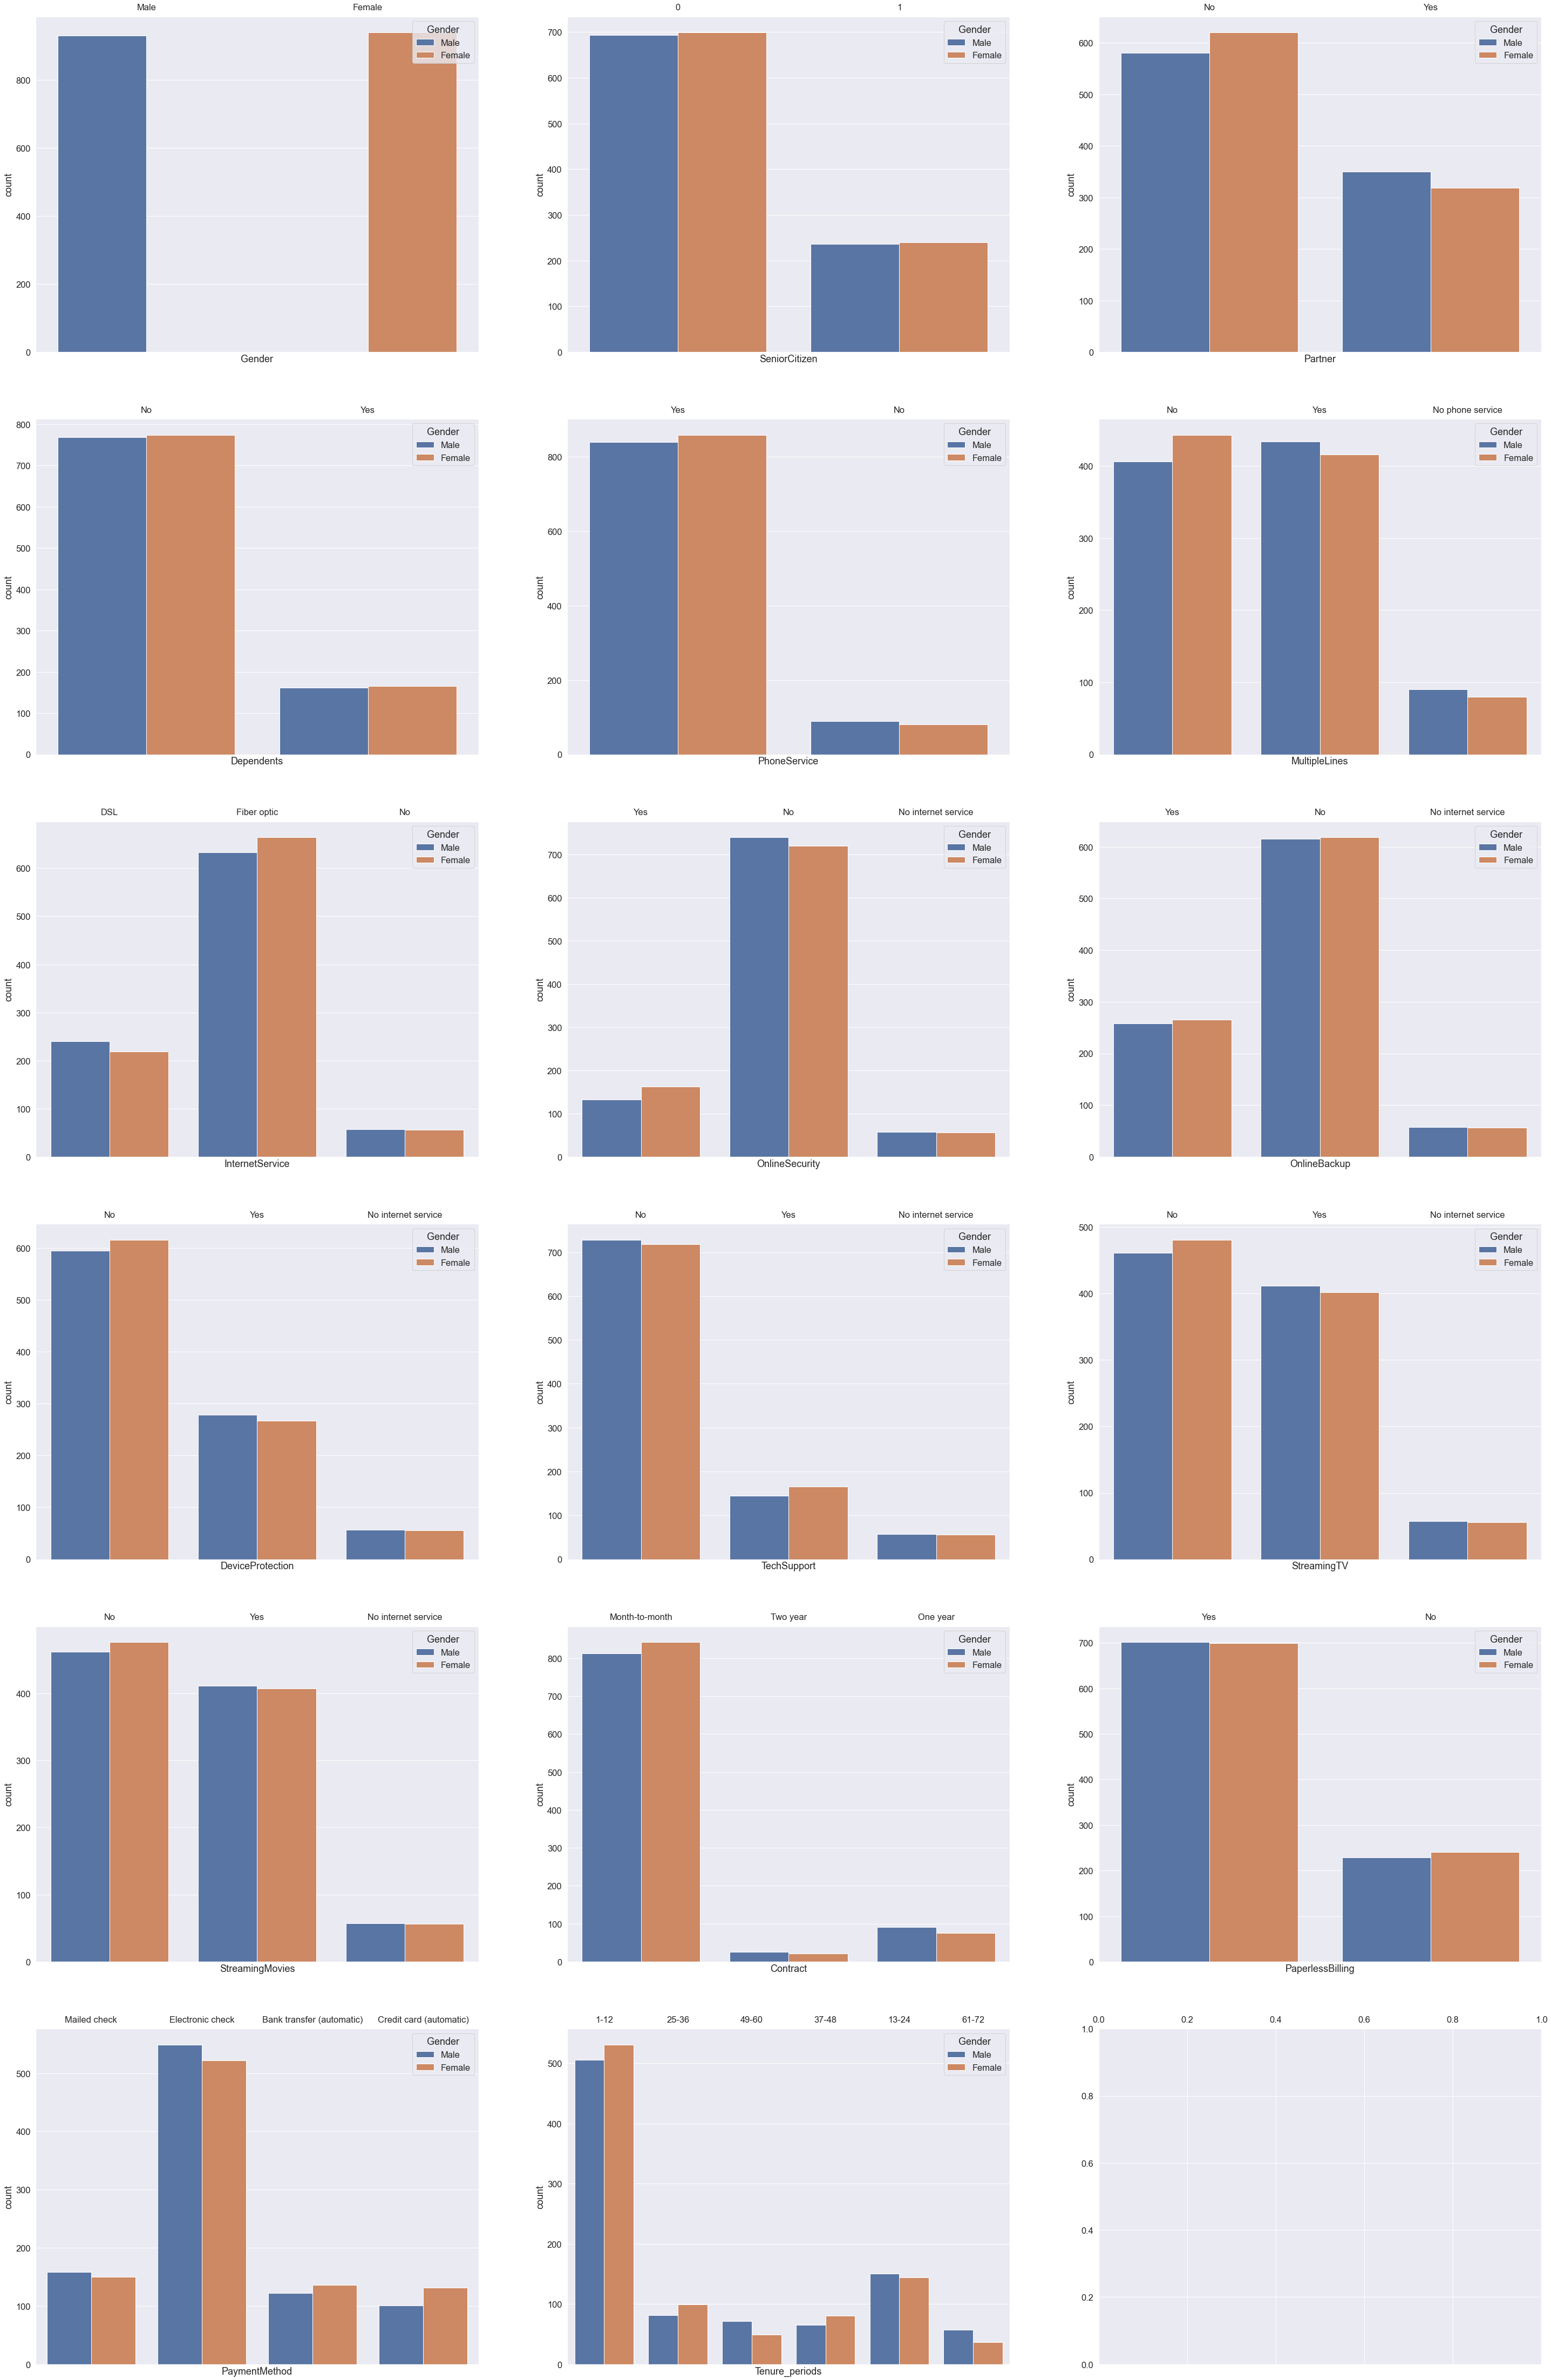

In [282]:
sns.set(font_scale=1.5)
fig , ax = plt.subplots(6,3,figsize = (50,80))
for i , subplots in zip (categorical , ax.flatten()):
  sns.countplot(data = df[df['Churn'] == 1], x = i ,hue = 'Gender', ax = subplots)
plt.show()

As seen before, Gender has very little or non influence on Churn rate. <br>
Non-senior citizens are highest churners. <br>
Most of the churners has fiber optic internet service <br>
Most of the churners are <b>getting electronic checks</b> <br>
Most of the churners leave in first 12 months